<a href="https://colab.research.google.com/github/Jihoon0309/Data_study_book/blob/main/%08Chapter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 객체지향 API로 그래프 꾸미기

**pyplot 방식과 객체지향 API 방식**

matplotlib.pyplot에 있는 함수를 사용하는 pyplot 방식</br>
명시적으로 패겨 객체와 서브플롯 객체를 만들고 이 객체의 메서드를 사용하는 객체지향 API 방식

In [77]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100 # 맷플롯립의 기본 DPI를 100으로 설정

pyplot 방식으로 그래프 그리기</br>

matplotlib.pyplot에 있는 함수를 사용하면 함수들이 하나의 피겨 객체에 대한 상태를 공유함</br>
선 그래프를 그리면 plot() 함수와 title() 함수는 동일한 피겨 객체에 적용됨

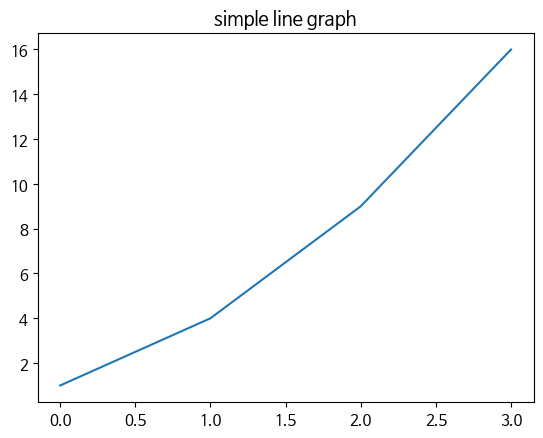

In [78]:
plt.plot([1,4,9,16])
plt.title('simple line graph')
plt.show()

객체지향 API 방식으로 그래프 그리기</br>

피겨 객체와 Axes 객체를 사용하는 객체지향 방식(fig라는 틀에 ax라는 종이를 놓고 그 위에 그래프를 그린다.)

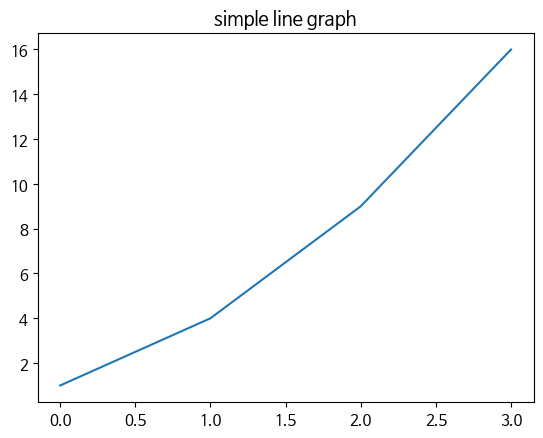

In [79]:
fig, ax = plt.subplots()
ax.plot([1,4,9,16])
ax.set_title('simple line graph')
fig.show()

복잡한 그래프를 그릴때 객체지향 방식이 더 좋음 특히 하나의 피겨에 여러 개의 서브플롯을 추가하는 경우

**그래프에 한글 출력하기**

폰트 설치

In [80]:
import sys
if 'google.colab' in sys.modules:
  !echo 'debconf debconf/frontend select Noninteractive' | \
  debconf-set-selections

  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
  for fpath in font_files:
    fm.fontManager.addfont(fpath)

In [81]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100

폰트 지정하기(1): font.family 속성</br>
기본폰트는 font.family 속성에 저장되어있음

In [82]:
plt.rcParams['font.family']

['NanumBarunGothic']

In [83]:
plt.rcParams['font.family'] = 'NanumGothic'

폰트 지정하기(2):rc() 함수</br>
나눔바른고딕 폰트로 바꾸기 font가 그룹이고 family는 그룹의 하위 속성임

In [84]:
plt.rc('font', family='NanumBarunGothic')

rc()함수를 사용하면 한 그룹내의 여러 설정을 동시에 지정 가능

In [85]:
plt.rc('font', family='NanumBarunGothic', size=11)

In [86]:
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumBarunGothic'] 11.0


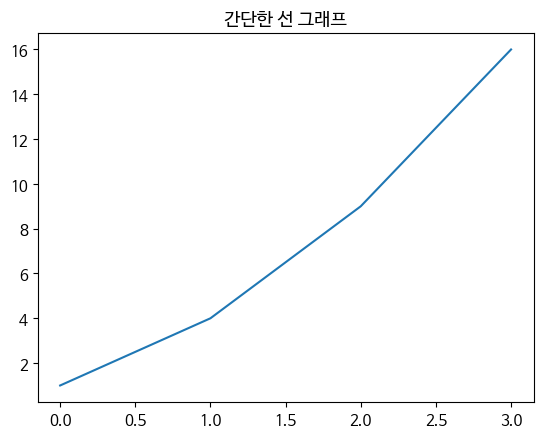

In [87]:
plt.plot([1,4,9,16])
plt.title('간단한 선 그래프')
plt.show()

**출판사별 발행 도서 개수 산점도 그리기**

In [88]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()


Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:01<00:00, 38.2MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


고유한 출판사 목록 만들기</br>
value_counts() 메서드 사용해 고유한 출판사 목록을 만듦

In [89]:
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs

문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: 출판사, dtype: int64

In [90]:
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
top30_pubs_idx

0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool

In [91]:
top30_pubs_idx.sum()

51886

데이터가 5만개가 넘기때문에 산점도로 그리기에 너무 많은 데이터여서 1000개만 무작위로 선택함</br>
sample() 메서드 사용</br>
random_state 매개변수에 임의의 숫자를 적음 seed() 함수와 비슷한 역할을함

In [92]:
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
ns_book8.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02


산점도 그리기</br>
x축에 '발행년도', y축에 '출판사' 지정

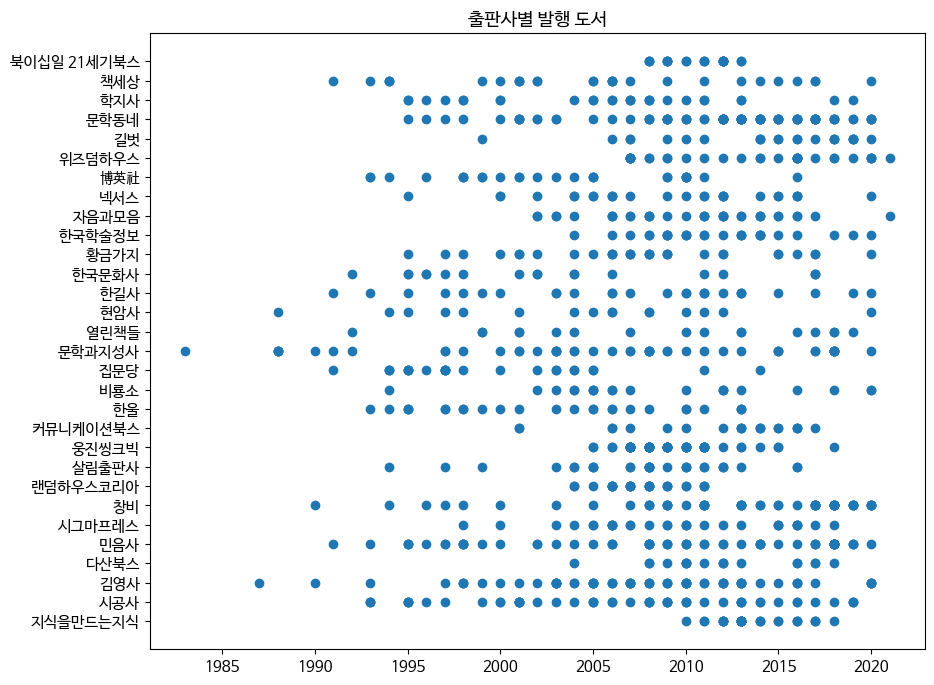

In [93]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'])
ax.set_title('출판사별 발행 도서')
fig.show()

값에 따라 마커 크리 다르게 나타내기</br>
scatter() 함수는 마커의 크기를 지정할 수 있는 s 매개변수를 제공

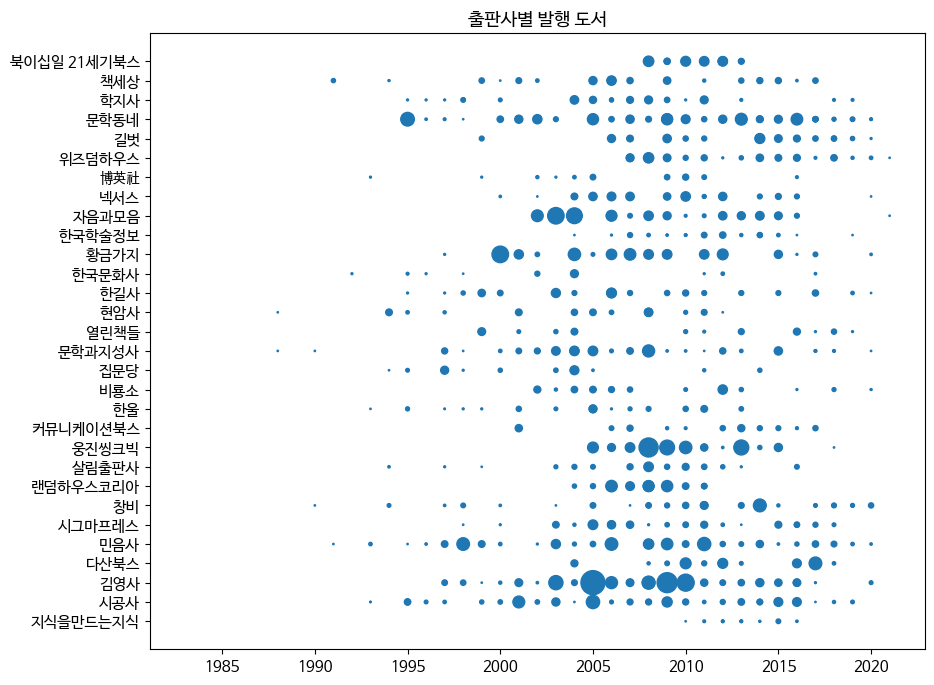

In [94]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], ns_book8['대출건수']) #(x축, y축, 마커 크기)
ax.set_title('출판사별 발행 도서')
fig.show()

마커 꾸미기</br>


1. 투명도 조절하기</br>
alpah 매개변수 : 마커의 투명도 조절
2. 마커 테두리 색 바꾸기</br>
edgecolor 매개변수 : 마커 테두리의 색 결정
3. 마커 테두리 선 두께 바꾸기</br>
linewidths 매개변수 : 마커 테두리 선 두꼐 결정
4. 산점도 색 바꾸기</br>
c 매개변수 : 산점도의 색을 지정

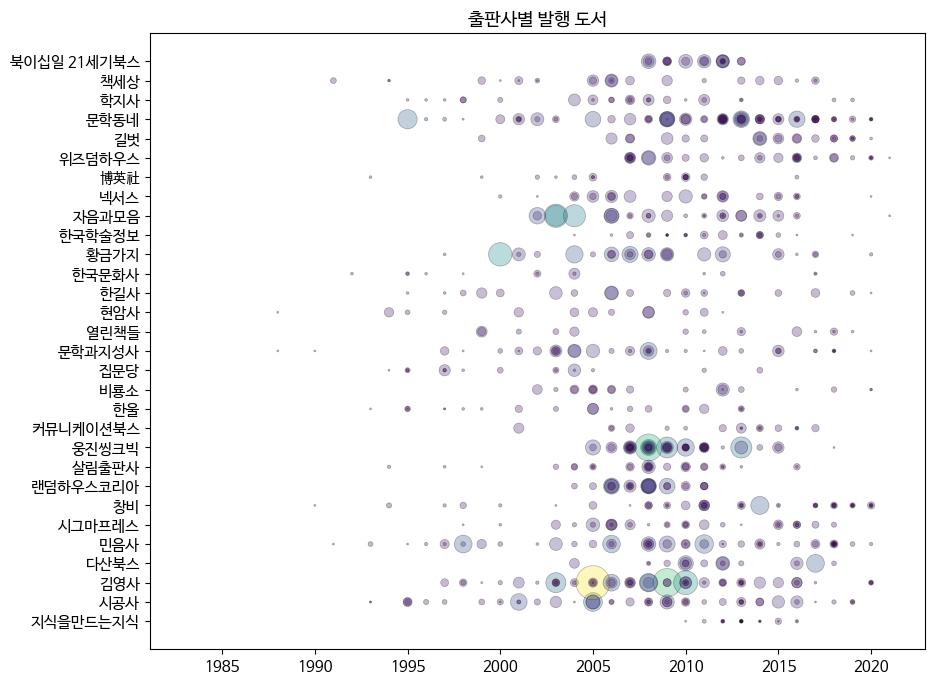

In [95]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], linewidths=0.5, edgecolors='k', alpha=0.3, s=ns_book8['대출건수']*2, c=ns_book8['대출건수'])
ax.set_title('출판사별 발행 도서')
fig.show()

'황금가지'에서 발행한 도서 중에 높은 대출건수를 기록한 것은 2000년에 발행한 도서지만, 다른 도서들은 대부분 2005년 이후에 출간된 도서임

값에 따라 색상 표현하기: 컬러맵</br>
scatter() 함수가 사용하는 기본값인 viridis 컬러맵으로 표현됨</br>
자주 사용되는 컬러맵 중 하나는 jet 컬러맵임 낮은 값일수록 짙은 파란색이고, 높은 값으로 갈수록 점차 노란색으로 바뀌었다가 붉은 색으로 됨

컬러맵은 cmap 매개변수로 지정할 수 있고, 컬러 막대는 scatter() 함수가 바노한하는 객체를 colorbar() 메서드에 전달하면됨

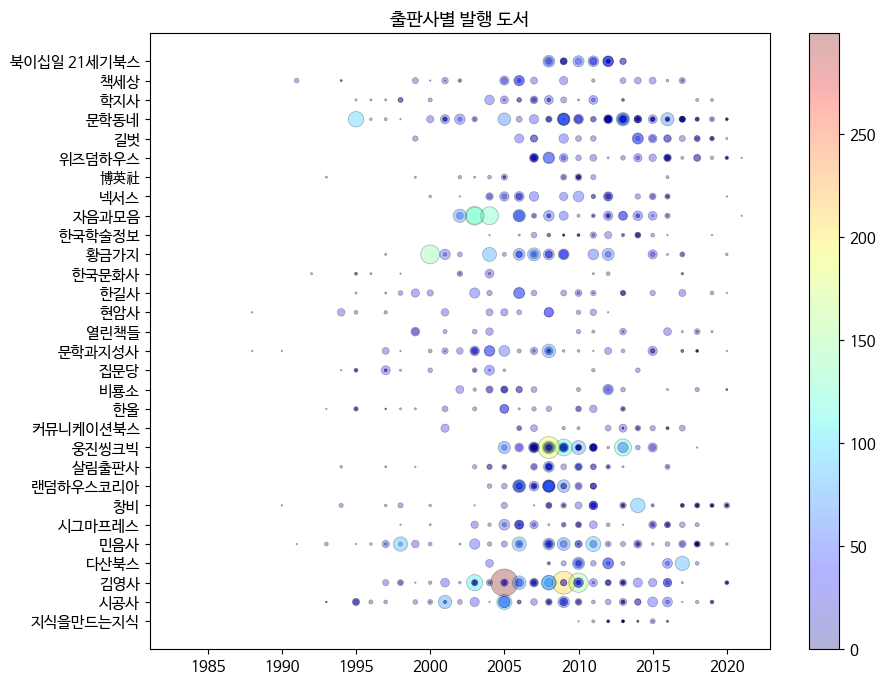

In [96]:
fig, ax = plt.subplots(figsize=(10,8))
sc=ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], linewidths=0.5, edgecolors='k', alpha=0.3, s=ns_book8['대출건수']*1.3, c=ns_book8['대출건수'], cmap='jet')
ax.set_title('출판사별 발행 도서')
fig.colorbar(sc)
fig.show()

# 맷플롯립의 고급 기능 배우기

**하나의 피겨에 여러 개의 선 그래프 그리기**

선 그래프를 그리는 plot() 함수를 여러 번 호출하면됨

In [97]:
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)

In [98]:
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
ns_book9

,출판사,발행년도,대출건수
0,민음사,2021,0
4,김영사,2021,0
23,문학동네,2021,0
24,한길사,2021,0
39,현암사,2021,0
...,...,...,...
376738,문학과지성사,1983,0
376739,문학과지성사,1983,0
376755,시공사,1995,0
376762,집문당,1990,0


In [99]:
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()
ns_book9

대출건수
출판사  발행년도      
博英社  1947     0
     1975     0
     1977     0
     1986     1
     1987     1
...         ...
황금가지 2018   200
     2019   133
     2020    98
     2021     1
     2030     2

[886 rows x 1 columns]

In [100]:
ns_book9 = ns_book9.reset_index()
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


선 그래프 2개 그리기

In [101]:
line1 = ns_book9[ns_book9['출판사']=='황금가지']
line2 = ns_book9[ns_book9['출판사']=='비룡소']

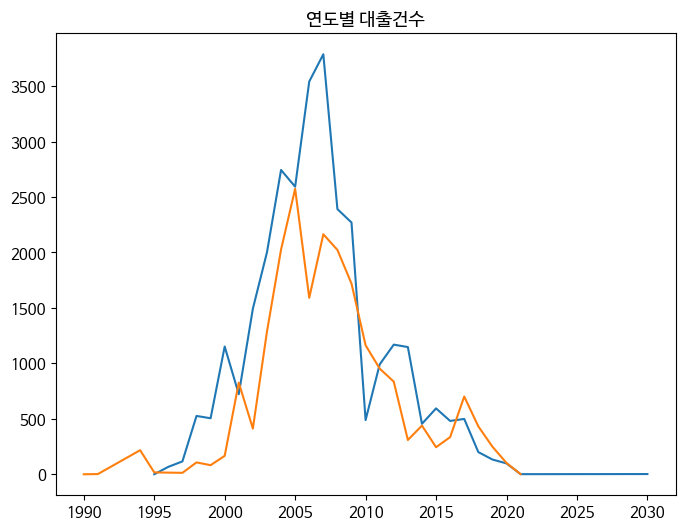

In [102]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('연도별 대출건수')
fig.show()

어떤색이 어떤 출판사인지 모르기때문에 범례를 추가해주면 그래프 이해하는데 도움이된 legend() 메서드 사용

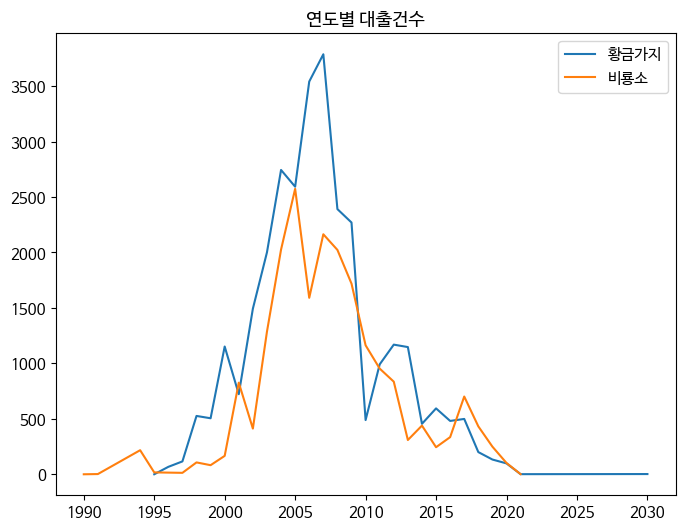

In [103]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

선 그래프 5개 그리기</br>
 for 문과 슬라이스 연산자를 통해 선 그래프 그릴수 있음

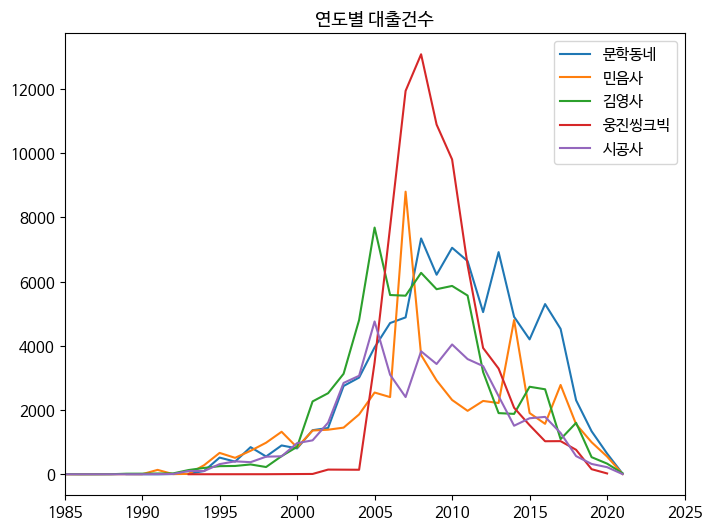

In [104]:
fig, ax = plt.subplots(figsize=(8,6))
for pub in top30_pubs.index[:5]:
  line=ns_book9[ns_book9['출판사'] == pub]
  ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('연도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
fig.show()

스택 영역 그래프</br>
하나의 선 그래프 위에 다른 선 그래프를 차례대로 쌓는 것</br>
stackplot() 메서드 사용해서 그릴 수 있음</br>
x축의 값은 '발행년도' 전달하고 y축 값은 2차원 배열로 전달해야 함 여기서 2차원 배열의 행은 '출판사' , 열은 '발행년도' 임



1.   pivot_tabel() 메서드로 각 '발행년도' 열의 값을 열로 바꾸기</br>
y축에 넣을 2차원 배열을 만듦
2.   '발행년도'열을 리스트 형태로 바꾸기</br>
x축에 넣을 리스트를 만듦
3. stackplot() 메서드로 스택 영역 그래프 그리기



In [105]:
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

여기서 열이 다단으로 구성되어있음 첫 번쨰 열을 보면 1947이 아닌 ('대출건수', 1947)임

In [106]:
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

get_level_values() 메서드는 다단으로 구성된 열 이름에서 선택한 항목만 가져올 수 있음

In [107]:
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)
year_cols

Int64Index([1947, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
            1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020, 2021, 2030],
           dtype='int64', name='발행년도')

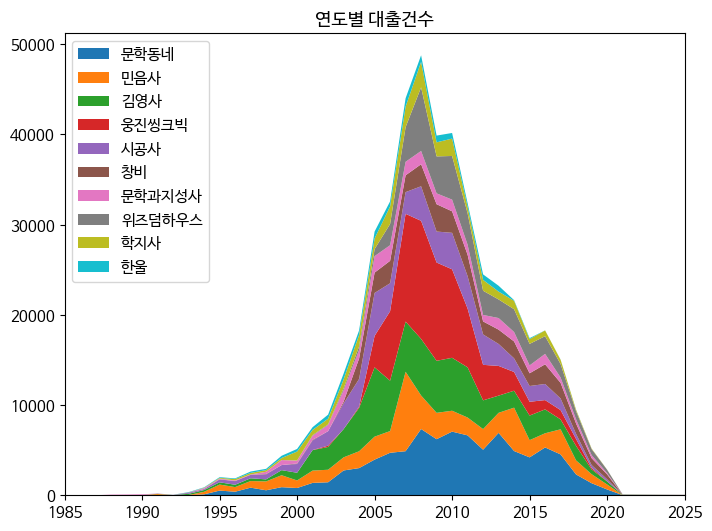

In [108]:
fig, ax = plt.subplots(figsize=(8,6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left') # 범례를 왼쪽 상단에 표시
ax.set_xlim(1985, 2025)
fig.show()

**하나의 피겨에 여러 개의 막대 그래프 그리기**

bar() 메서드 여러번 호출하면 됨

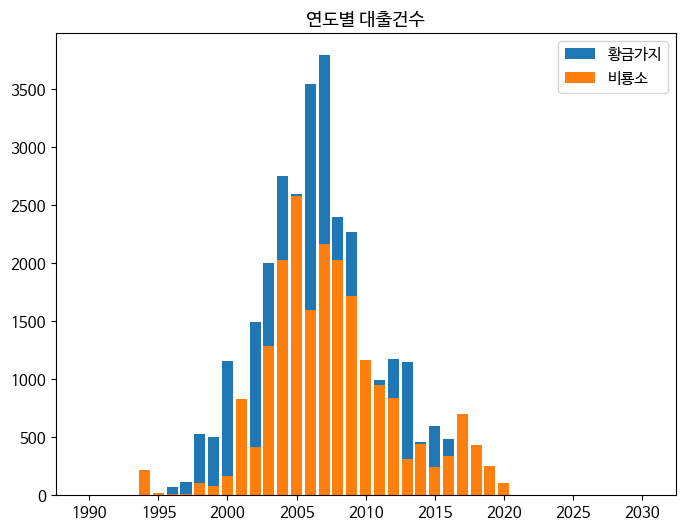

In [109]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.bar(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

이렇게되면 위에 덮어쓰게되서 대출건수를 올바르게 나타내기 힘듦</br>
막대 기본넓이가 0.8이기 때문에 0.4씩으로 지정하고 막대를 앞위로 각각 0.2씩 이동한다

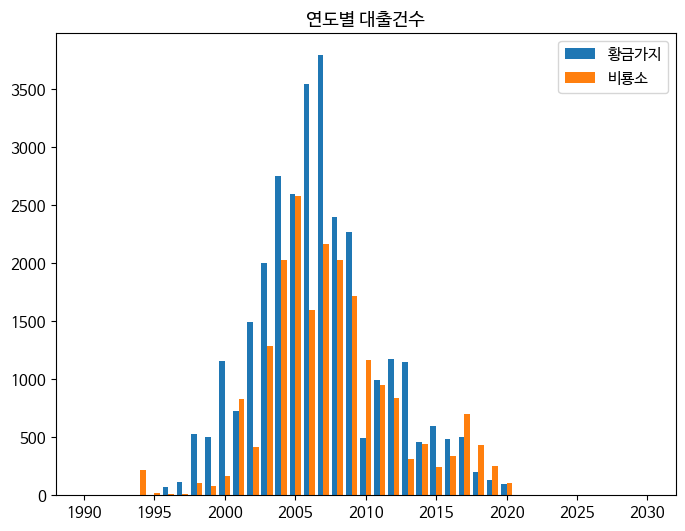

In [110]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지')
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

스택 막대 그래프</br>
stackplot() 처럼 막대 그래프를 쌓을 수 있는 함수가 없는대신 bottom 매개변수를 사용하여 수동으로 막대를 쌓을수 있음

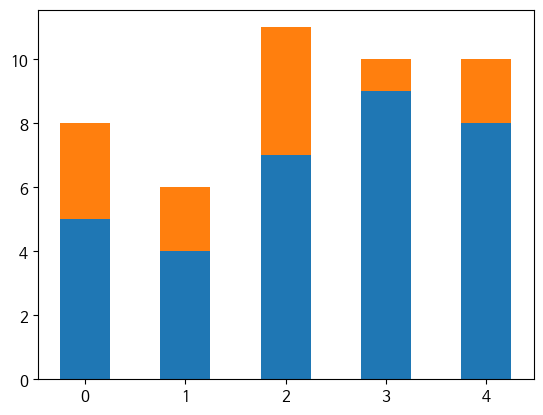

In [111]:
height1=[5,4,7,9,8]
height2=[3,2,4,1,2]

plt.bar(range(5), height1, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5) # bottom 을 사용하여 height1 막대가 끝나는 위치에서 시작
plt.show()

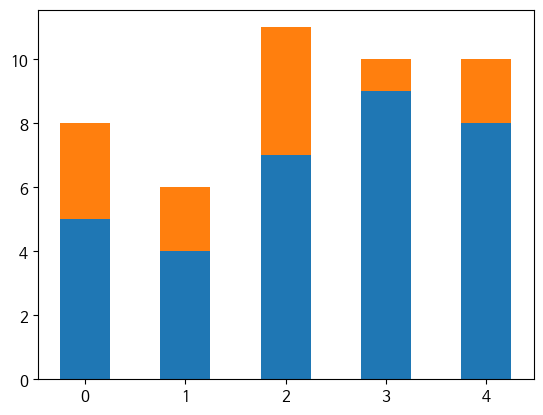

In [112]:
height3 = [a+b for a,b in zip(height1, height2)]

plt.bar(range(5), height3, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5) # bottom 을 사용하여 height1 막대가 끝나는 위치에서 시작
plt.show()

이렇게 그리면 bottom 매개변수를 사용하지 않고 그릴 수 있음

데이터값 누적하여 그리기</br>

cumsum() 메서드를 사용하여 값을 누적

In [113]:
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [114]:
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

민음사의 경우 문학동네 대출건수 + 민음사 대출건수 인걸 볼 수있음

In [115]:
ns_book12 = ns_book10.loc[top10_pubs].cumsum()

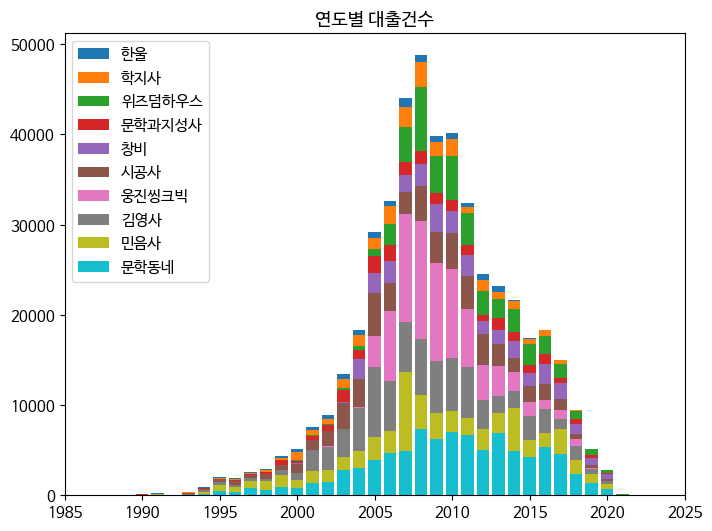

In [116]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in reversed(range(len(ns_book12))): #역순으로 그리기위해서 reversed 사용
  bar=ns_book12.iloc[i] # 행 추출
  label=ns_book12.index[i] # 출판사 이름 추출
  ax.bar(year_cols, bar, label=label)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

**원 그래프 그리기**

pie() 메서드

In [119]:
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

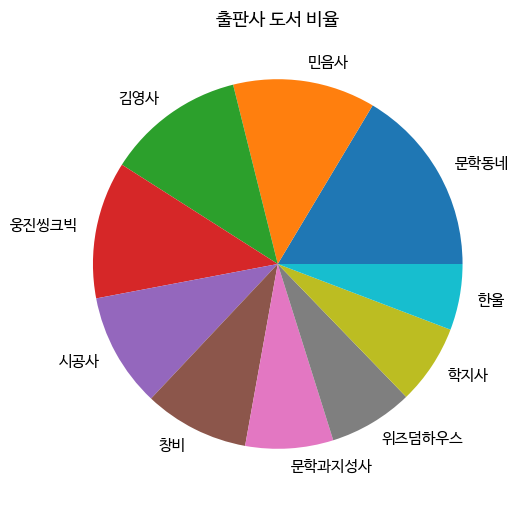

In [120]:
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서 비율')
fig.show() # 3시부터 반시계방향으로 그려짐

원 그래프의 단점</br>
어떤 데이터가 더 큰지 한눈에 구분하기 어려움

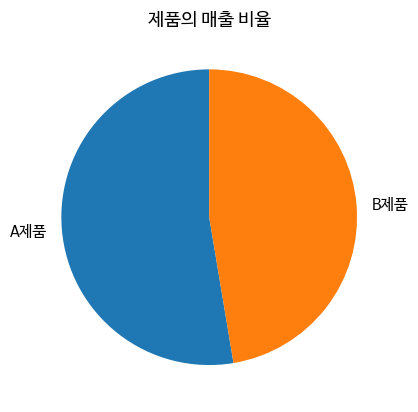

In [121]:
plt.pie([10,9], labels=['A제품', 'B제품'], startangle=90) # 12시 방향부터 시작
plt.title('제품의 매출 비율')
plt.show()

비율 표시하고 부채꼴 강조하기</br>

autopct 매개변수에는 % 연산자에 적용할 포맷팅 문자열을 전달할 수 있음</br>
explode 매개변수에 떨어뜨리길 원하는 족ㄱㄱ의 간격을 반지름의 비율로 지정하여 조금 떨어뜨릴수 있음

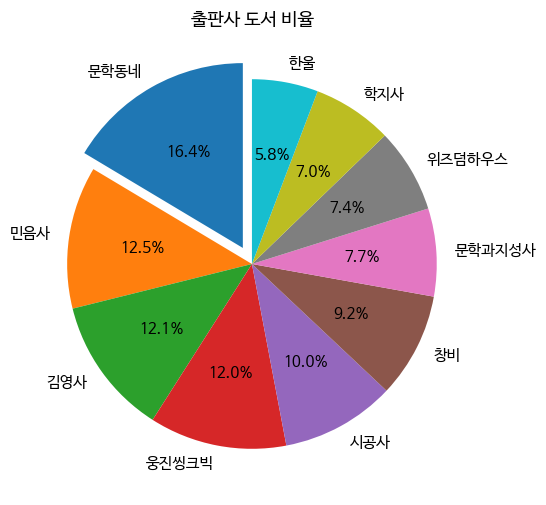

In [122]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
ax.set_title('출판사 도서 비율')
fig.show()

**여러 종류의 그래프가 있는 서브플롯 그리기**

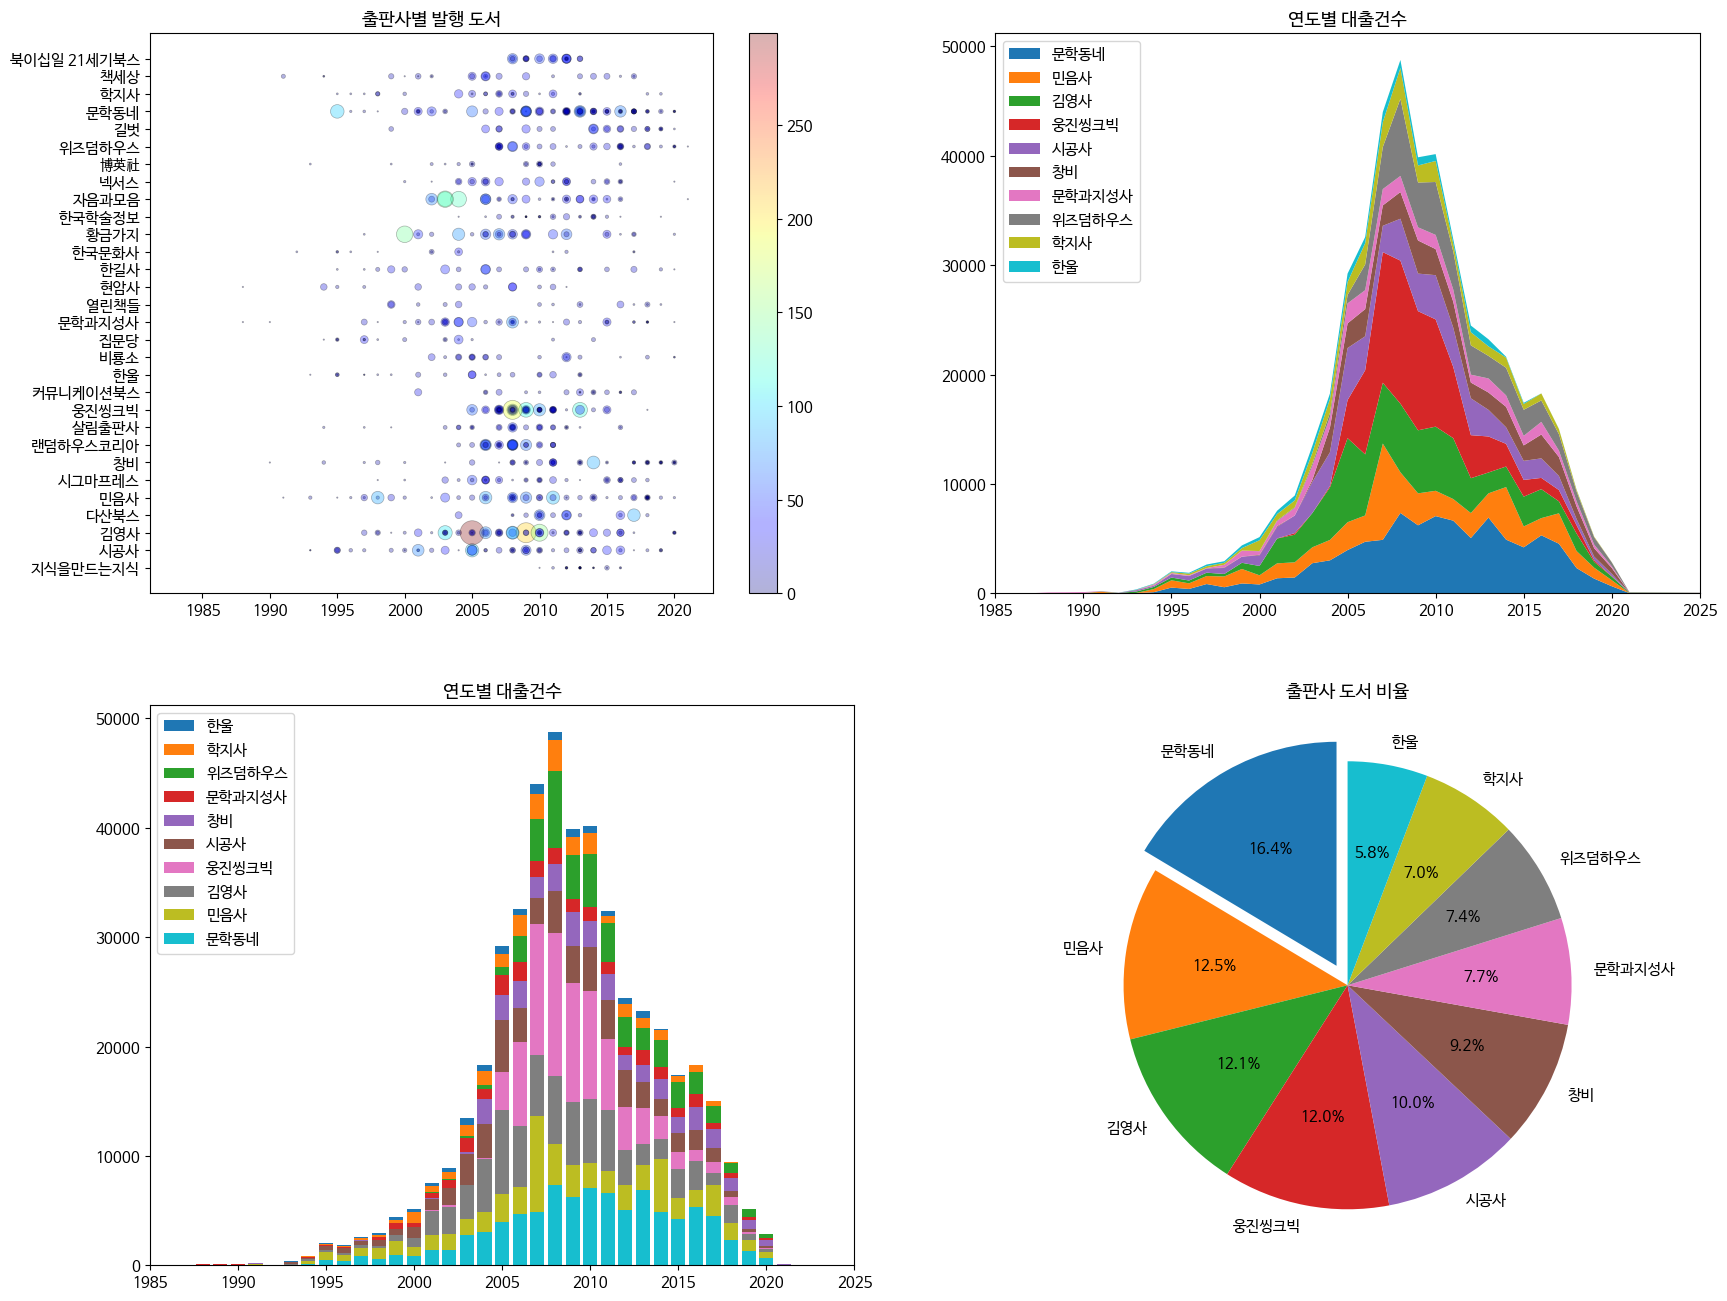

In [125]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 산점도
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axes[0, 0].scatter(ns_book8['발행년도'], ns_book8['출판사'], linewidths=0.5, edgecolors='k', alpha=0.3, s=ns_book8['대출건수'], c=ns_book8['대출건수'], cmap='jet')
axes[0,0].set_title('출판사별 발행 도서')
fig.colorbar(sc, ax=axes[0,0])

# 스택 영역 그래프
axes[0,1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
axes[0,1].set_title('연도별 대출건수')
axes[0,1].legend(loc='upper left')
axes[0,1].set_xlim(1985, 2025)

# 스택 막대 그래프
for i in reversed(range(len(ns_book12))):
  bar=ns_book12.iloc[i] # 행 추출
  label=ns_book12.index[i] # 출판사 이름 추출
  axes[1,0].bar(year_cols, bar, label=label)
axes[1,0].set_title('연도별 대출건수')
axes[1,0].legend(loc='upper left')
axes[1,0].set_xlim(1985, 2025)

# 원 그래프
axes[1,1].pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
axes[1,1].set_title('출판사 도서 비율')

fig.savefig('all_in_one.png')
fig.show()

# 마무리

맷플롯립의 객체지향 API는 명시적으로 피겨 객체와 서브플롯 객체를 만들고 이 객체의 메서드를 사용하여 맷플롯립 그래프를 그리는 방법</br>
컬러맵 : 맷플롯립에서 그래프를 그리는데 사용하기 위해 사전에 정의한 색상 리스트</br>
컬러 막대 : 데이터 포인트에 적용된 색상의 범위를 보여주는 막대</br>

matplotlib.pyplot.rc() : rcParams 객체의 값 설정</br>
Figure.colorbar() : 그래프에 컬러 막대 추가

범례 : 그래프에 그려진 데이터의 이름과 색상을 요약한 표</br>
피벗 테이블 : 테이블 형태의 데이터를 평균, 합 등 방식으로 집계하여 만든 요약표</br>
스택 영역 그래프 : 여러 개의 선 그래프를 y축 방향으로 쌓은 그래프</br>
스택 막대 그래프 : 여러 개의 막대 그래프를 y축 방향으로 쌓은 그래프</br>
원 그래프 : 데이터의 비율을 부채꼴 모양으로 나타낸 그래프</br>

Axes.legend() : 그래프에 범례 추가</br>
Axes.set_xlim() : x축의 출력 범위 지정</br>
DataFrame.pivot_table() : 피벗 테이블 기능 제공</br>
Axes.stackplot() : 스택 영역 그래프 그림</br>
DataFrame.plot.area() : 스택 영역 그래프 그림</br>
DataFrame.plot.bar() : 막대 그래프를 그림</br>
DataFrame.cumsum() : 행이나 열 방향으로 누적 합을 계산</br>
Axes.pie() : 원 그래프를 그림